# สนามไฟฟ้าเนื่องจากประจุแบบเส้น

หาสนามไฟฟ้าเนื่องจากประจุแบบจุดหลายตัว ขนาดตัวละ $1~\mu C$ วางอยู่บนเส้นตรงยาว $1~m$ โดยมีระยะห่างกัน $1~cm$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot

In [28]:
Q = 1e-6
Yp = np.linspace(-0.5, 0.5, 1000)
Xp = np.zeros(len(Yp))

(-2.0, 2.0)

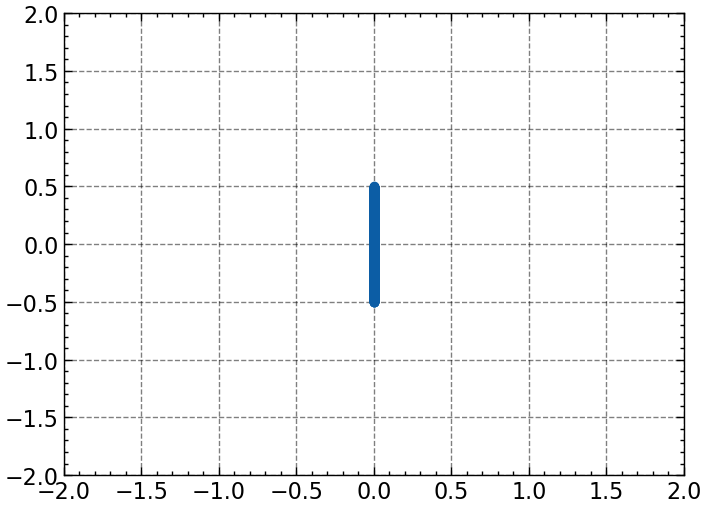

In [29]:
plt.scatter(Xp, Yp)
plt.xlim([-2, 2])
plt.ylim([-2, 2])

In [30]:
def E(x, y):
    r = np.array([x, y])
    E_total = 0
    for i in range(len(Xp)):
        rp = np.array([Xp[i], Yp[i]])
        R = r - rp
        field = Q / (4 * pi * epsilon_0) * R / norm(R)**3
        E_total += field
    return E_total

In [31]:
E(1, 2)

array([ 866767.9169494 , 1647582.35188974])

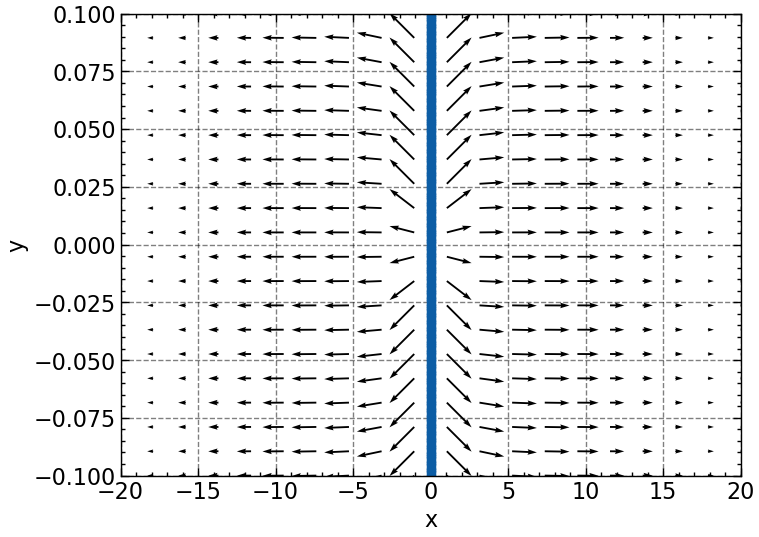

In [32]:
plt.scatter(Xp, Yp)
field_plot(E, x_min=-20, x_max=20, y_min=-0.1, y_max=0.1)

## Symbolic Mathematics using Sympy

In [1]:
import sympy as smp

In [12]:
z = smp.symbols('z')

In [16]:
rho_v = 10.0 * (1.0 - smp.exp(-0.5 * z))
rho_v

10.0 - 10.0*exp(-0.5*z)

In [17]:
smp.integrate(rho_v, z)

10.0*z + 20.0*exp(-0.5*z)

In [18]:
smp.integrate(rho_v, [z, 0, 1])

2.13061319425267

In [21]:
theta = smp.symbols('theta')
theta

theta

In [24]:
smp.integrate(smp.cos(theta) * smp.sin(theta))

sin(theta)**2/2

In [27]:
smp.integrate(smp.cos(theta) * smp.sin(theta), [theta, 0, smp.pi / 2])

1/2

### สนามไฟฟ้าเนื่องจากประจุแบบเส้นตรง

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import scipy as sp

In [2]:
rho_l, x, y, epsilon_0, yp = smp.symbols("rho_l x y epsilon_0 y'")

In [3]:
r = smp.Matrix([x, y])
rp = smp.Matrix([0, yp])
R = r - rp

dEdyp = rho_l / (4 * smp.pi * epsilon_0) * (R / R.norm()**3)
dEdyp

Matrix([
[       rho_l*x/(4*pi*epsilon_0*(Abs(x)**2 + Abs(y - y')**2)**(3/2))],
[rho_l*(y - y')/(4*pi*epsilon_0*(Abs(x)**2 + Abs(y - y')**2)**(3/2))]])

In [4]:
# Integrate for E
E = smp.integrate(dEdyp, [yp, -0.5, 0.5]).subs({rho_l:1e-6, smp.pi:np.pi, epsilon_0:sp.constants.epsilon_0})
E

Matrix([
[8987.55179226117*x*(0.5 - y)/(sqrt((0.5 - y)**2/Abs(x)**2 + 1)*Abs(x)**3) - 8987.55179226117*x*(-y - 0.5)/(sqrt((-y - 0.5)**2/Abs(x)**2 + 1)*Abs(x)**3)],
[                              -8987.55179226117/(sqrt((-y - 0.5)**2/Abs(x)**2 + 1)*Abs(x)) + 8987.55179226117/(sqrt((0.5 - y)**2/Abs(x)**2 + 1)*Abs(x))]])

In [5]:
E_f = smp.lambdify([x, y], E)
E_f

<function _lambdifygenerated(x, y)>

In [6]:
E_field = E_f(1, 2)
E_field

array([[ 866.63723311],
       [1647.50380386]])

In [7]:
def E_func(x, y):
    Ex = E_f(x, y)[0][0]
    Ey = E_f(x, y)[1][0]
    return np.array([Ex, Ey])

In [8]:
E_func(1, 2)

array([ 866.63723311, 1647.50380386])

In [9]:
# Line charge
Y = np.linspace(-0.5, 0.5, 3)
X = np.zeros(len(Y))

<Axes: xlabel='x', ylabel='y'>

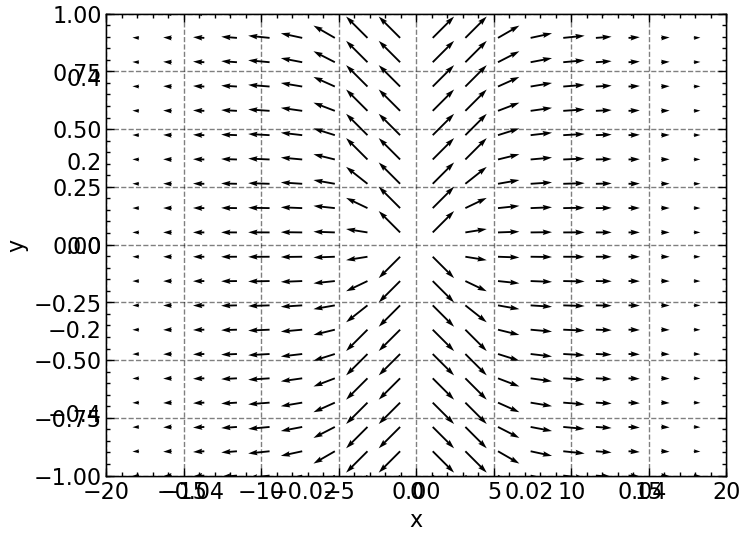

In [10]:
plt.plot(X, Y)
field_plot(E_func, x_min=-20, x_max=20, y_min=-1, y_max=1)

<Axes: xlabel='x', ylabel='y'>

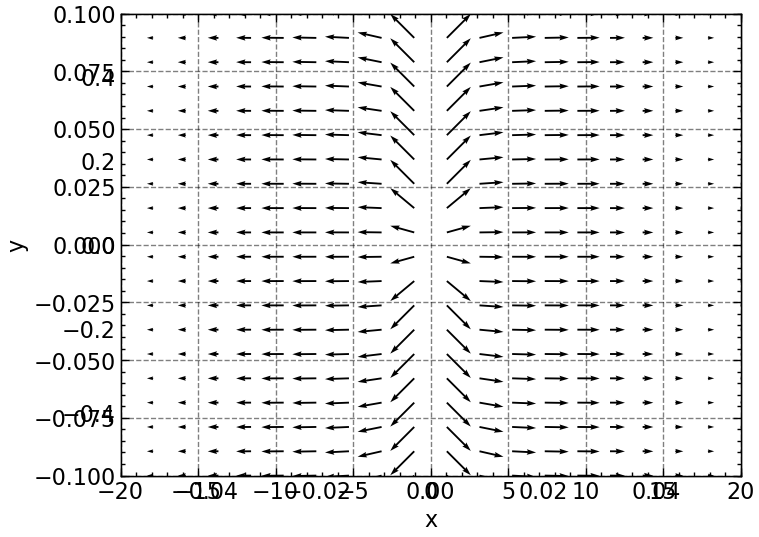

In [11]:
plt.plot(X, Y)
field_plot(E_func, x_min=-20, x_max=20, y_min=-0.1, y_max=0.1)

## Homework 1
(ก) จงแสดงการหาประจุ $Q$ ทั้งหมดของประจุแบบเส้นที่มีความหนาแน่นประจุ $\rho_l=-2.5\sin(\frac{2\pi}{L}x)~nC/m$ ยาว $L=10~cm$ ที่วางบนแกน $x$ ระหว่าง $-5<x<5~cm$

In [39]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import scipy as sp

In [40]:
x, y, epsilon_0, L, xp = smp.symbols("x y epsilon_0 L x'")

In [41]:
def rho_l(x):
    l_charge = -2.5 * smp.sin(2.0 * smp.pi / L * x) * 1e-9
    return l_charge

In [42]:
rho_l(x)

-2.5e-9*sin(2*pi*x/L)

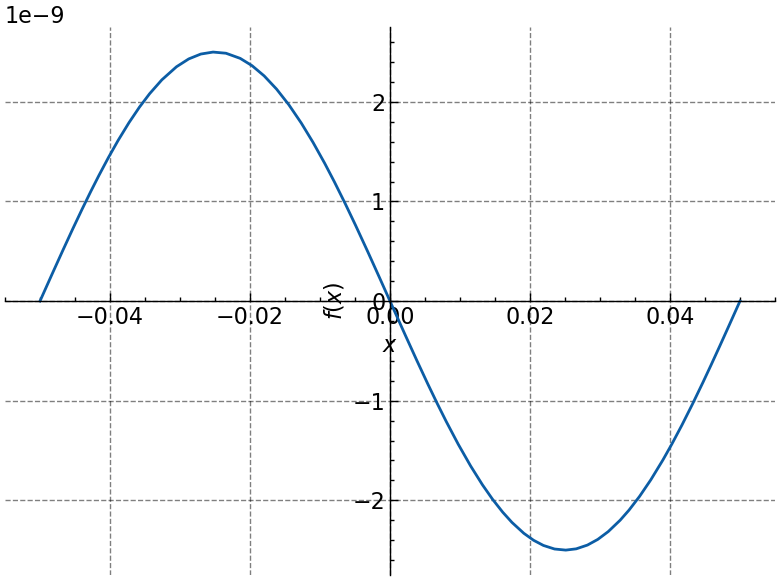

In [43]:
smp.plot(rho_l(x).subs(L, 10e-2), (x, -5e-2, 5e-2))

In [44]:
# ประจุลัพธ์ของประจุแบบเส้น
smp.integrate(rho_l(x).subs(L, 10e-2), (x, -5e-2, 5e-2))

0

#### สนามไฟฟ้าเนื่องจากประจุแบบเส้นไม่สม่ำเสมอ

(ข)จงแสดงการหาสนามไฟฟ้า $\mathbf{E}$ เนื่องจากประจุแบบเส้นที่มีความหนาแน่นประจุ $\rho_l=-2.5\sin(\frac{2\pi}{L}x)~nC/m$ ยาว $L=10~cm$ ที่วางบนแกน $x$ ระหว่าง $-5<x<5~cm$

In [45]:
r = smp.Matrix([x, y])
rp = smp.Matrix([xp, 0])
R = r - rp
R

Matrix([
[x - x'],
[     y]])

In [46]:
dEdxp = rho_l(xp) / (4.0 * smp.pi * epsilon_0) * R / R.norm()**3
dEdxp

Matrix([
[-6.25e-10*(x - x')*sin(2*pi*x'/L)/(pi*epsilon_0*(Abs(y)**2 + Abs(x - x')**2)**(3/2))],
[       -6.25e-10*y*sin(2*pi*x'/L)/(pi*epsilon_0*(Abs(y)**2 + Abs(x - x')**2)**(3/2))]])

In [40]:
smp.integrate(dEdxp.subs({L:10e-2, smp.pi:np.pi, epsilon_0:sp.constants.epsilon_0}), (xp, -5e-2, 5e-2))

Matrix([
[-22.4688794806529*Integral(x*sin(62.8318530717959*x')/(sqrt(Abs(y)**2 + Abs(x - x')**2)*Abs(y)**2 + sqrt(Abs(y)**2 + Abs(x - x')**2)*Abs(x - x')**2), (x', -0.05, 0.05)) - 22.4688794806529*Integral(-x'*sin(62.8318530717959*x')/(sqrt(Abs(y)**2 + Abs(x - x')**2)*Abs(y)**2 + sqrt(Abs(y)**2 + Abs(x - x')**2)*Abs(x - x')**2), (x', -0.05, 0.05))],
[                                                                                                                                                                            -22.4688794806529*y*Integral(sin(62.8318530717959*x')/(sqrt(Abs(y)**2 + Abs(x - x')**2)*Abs(y)**2 + sqrt(Abs(y)**2 + Abs(x - x')**2)*Abs(x - x')**2), (x', -0.05, 0.05))]])

จะเห็นว่า Sympy ไม่สามารถ integrate ฟังก์ชันนี้โดยใช้วิธี Symbolic Integration (เหมือนทำด้วยมือ) ได้ ดังนั้นจึงต้องเปลี่ยนวิธีเป็น Numerical Integration แทน

In [47]:
integrands = dEdxp.subs({L:10e-2, smp.pi:np.pi, epsilon_0:sp.constants.epsilon_0})

In [48]:
dExdxp = smp.lambdify([xp, x, y], integrands[0])
dEydxp = smp.lambdify([xp, x, y], integrands[1])

In [49]:
from scipy.integrate import quad
def E(x, y):
    Ex = quad(dExdxp, -5e-2, 5e-2, args=(x, y))[0]
    Ey = quad(dEydxp, -5e-2, 5e-2, args=(x, y))[0]
    return np.array([Ex, Ey])

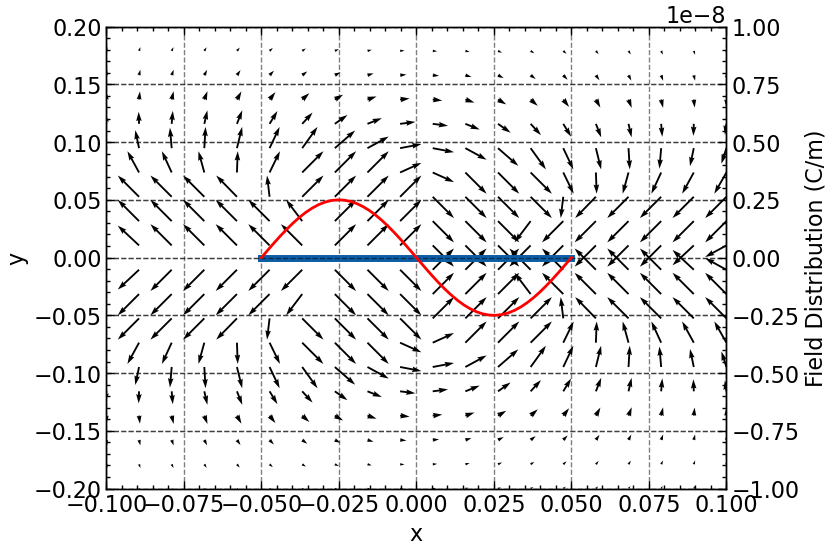

In [51]:
# Field plots
ax1 = field_plot(E, x_min=-10e-2, x_max=10e-2, y_min=-20e-2, y_max=20e-2, contour=False)

# line charge
X = np.linspace(-5e-2, 5e-2, 50)
Y = np.zeros(len(X))
plt.plot(X, Y, linewidth=5)

# charge distribution
charge_dist = smp.lambdify(x, rho_l(x).subs(L, 10e-2))
ax2 = ax1.twinx()
ax2.plot(X, charge_dist(X), color='r')
ax2.set_ylim([-10e-9, 10e-9])
ax2.set_ylabel('Field Distribution (C/m)')

plt.show()

## Homework 2
จงแสดงการหาสนามไฟฟ้าเนื่องจากประจุแบบเส้นสองเส้น วางขนานกัน ตามแนวแกน $x$ หรือ $y$ (ให้นิสิตเลือกได้ตามใจชอบ) ประจุทั้งสองมีความหนาแน่นประจุ $0.1~\mu C/m$ และ $-0.1~\mu C/m$ ตามลำดับ ประจุทั้งสองมีความยาวเท่ากัน ทั้งนี้ให้นิสิตเลือกความยาวและระยะห่างระหว่างประจุทั้งสองได้ตามสะดวก

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

In [16]:
# เลือกให้ประจุทั้งสองวางขนานกับแนวแกน x
x, y, xp = smp.symbols("x y x'")

#### สนามไฟฟ้าเนื่องจากประจุตัวที่ 1

In [23]:
# ระยะห่างระหว่างประจุทั้งสอง
gap = 0.1e-2

rho_l1 = 0.1e-6
r = smp.Matrix([x, y])
rp = smp.Matrix([xp, -0.5 * gap])
R = r - rp
R

Matrix([
[    x - x'],
[y + 0.0005]])

In [24]:
# ประจุทั้งสอง ยาว 10 cm
dE1dxp = rho_l1 / (4.0 * pi * epsilon_0) * R / R.norm()**3
E1 = smp.integrate(dE1dxp, [xp, -5e-2, 5e-2])
E1

Matrix([
[                                                                            -898.755179226117/(sqrt((-x - 0.05)**2/Abs(y + 0.0005)**2 + 1)*Abs(y + 0.0005)) + 898.755179226117/(sqrt((0.05 - x)**2/Abs(y + 0.0005)**2 + 1)*Abs(y + 0.0005))],
[(0.05 - x)*(898.755179226117*y + 0.449377589613059)/(sqrt((0.05 - x)**2/Abs(y + 0.0005)**2 + 1)*Abs(y + 0.0005)**3) - (-x - 0.05)*(898.755179226117*y + 0.449377589613059)/(sqrt((-x - 0.05)**2/Abs(y + 0.0005)**2 + 1)*Abs(y + 0.0005)**3)]])

#### สนามไฟฟ้าเนื่องจากประจุตัวที่ 2

In [25]:
rho_l2 = -0.1e-6
r = smp.Matrix([x, y])
rp = smp.Matrix([xp, 0.5 * gap])
R = r - rp

# ประจุทั้งสอง ยาว 10 cm
dE2dxp = rho_l2 / (4.0 * pi * epsilon_0) * R / R.norm()**3
E2 = smp.integrate(dE2dxp, [xp, -5e-2, 5e-2])
E2

Matrix([
[                                                                             898.755179226117/(sqrt((-x - 0.05)**2/Abs(y - 0.0005)**2 + 1)*Abs(y - 0.0005)) - 898.755179226117/(sqrt((0.05 - x)**2/Abs(y - 0.0005)**2 + 1)*Abs(y - 0.0005))],
[(0.05 - x)*(0.449377589613059 - 898.755179226117*y)/(sqrt((0.05 - x)**2/Abs(y - 0.0005)**2 + 1)*Abs(y - 0.0005)**3) - (0.449377589613059 - 898.755179226117*y)*(-x - 0.05)/(sqrt((-x - 0.05)**2/Abs(y - 0.0005)**2 + 1)*Abs(y - 0.0005)**3)]])

In [26]:
# สนามไฟฟ้ารวม
E_total = E1 + E2
E_total

Matrix([
[                                                                                                                                                         -898.755179226117/(sqrt((-x - 0.05)**2/Abs(y + 0.0005)**2 + 1)*Abs(y + 0.0005)) + 898.755179226117/(sqrt((-x - 0.05)**2/Abs(y - 0.0005)**2 + 1)*Abs(y - 0.0005)) + 898.755179226117/(sqrt((0.05 - x)**2/Abs(y + 0.0005)**2 + 1)*Abs(y + 0.0005)) - 898.755179226117/(sqrt((0.05 - x)**2/Abs(y - 0.0005)**2 + 1)*Abs(y - 0.0005))],
[(0.05 - x)*(0.449377589613059 - 898.755179226117*y)/(sqrt((0.05 - x)**2/Abs(y - 0.0005)**2 + 1)*Abs(y - 0.0005)**3) + (0.05 - x)*(898.755179226117*y + 0.449377589613059)/(sqrt((0.05 - x)**2/Abs(y + 0.0005)**2 + 1)*Abs(y + 0.0005)**3) - (0.449377589613059 - 898.755179226117*y)*(-x - 0.05)/(sqrt((-x - 0.05)**2/Abs(y - 0.0005)**2 + 1)*Abs(y - 0.0005)**3) - (-x - 0.05)*(898.755179226117*y + 0.449377589613059)/(sqrt((-x - 0.05)**2/Abs(y + 0.0005)**2 + 1)*Abs(y + 0.0005)**3)]])

In [27]:
# เตรียม plot สนามไฟฟ้า
E_func = smp.lambdify([x, y], E_total)
def E(x, y):
    Ex = E_func(x, y)[0][0]
    Ey = E_func(x, y)[1][0]
    return np.array([Ex, Ey])

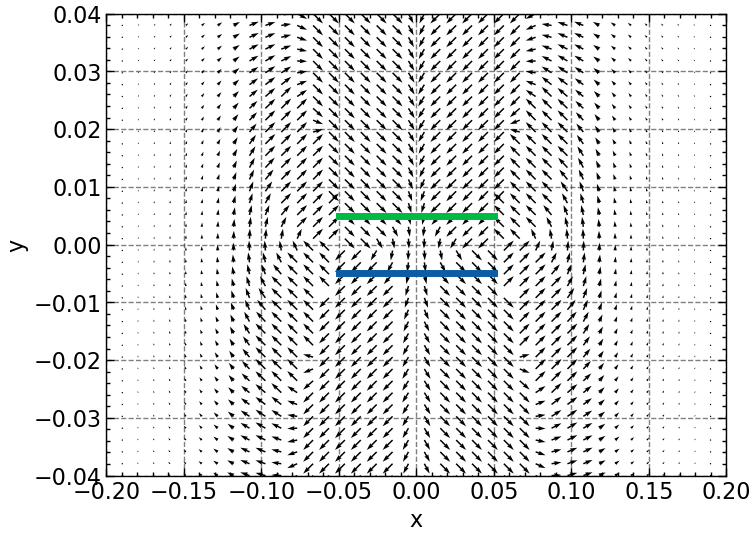

In [30]:
# Field Plot
ax1 = field_plot(E, x_min=-20e-2, x_max=20e-2, y_min=-4e-2, y_max=4e-2, num_grids=40)

# Charge Plot
X = np.linspace(-5e-2, 5e-2, 50)
Y1 = np.ones(len(X)) * -0.5e-2
Y2 = np.ones(len(X)) * 0.5e-2
plt.plot(X, Y1, linewidth=5)
plt.plot(X, Y2, linewidth=5)